# March Madness Machine Learning Project 
#### never lose your family braket challenge to your aunt who knows nothing about basketball ever again 
## James Griffin -- Kaggle Competition 

In [1889]:
# Importing LOTS of stuff 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

#from online suggestions I was reading 
from string import ascii_letters
import seaborn as sns
import statsmodels.api as sm # for linear regression, found it on some article 

# to solve problems that I am encounterinbg
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #plotting for visualization purposes of story telling 
import numpy as np

from tqdm import tqdm

import datetime
import gc
import numpy as np
import os
import operator
import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
sns.set_palette(sns.color_palette('hls', 7))

from statistics import mean

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import describe
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.model_selection import KFold, RepeatedKFold, GroupKFold
import random 
from random import sample

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report
from collections import Counter
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV



## Read in data 

In [2394]:
# teams that could make the tournament all D1 teams 

teams = pd.read_csv("Teams.csv")
teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2018
1,1102,Air Force,1985,2018
2,1103,Akron,1985,2018
3,1104,Alabama,1985,2018
4,1105,Alabama A&M,2000,2018


In [2395]:
power_seeds = pd.read_csv("PowerSeeds.csv")
power_seeds.tail()

,Season,PowerSeed,TeamName
955,2009,60,Robert Morris
956,2009,61,Chattanooga
957,2009,62,Radford
958,2009,63,ETSU
959,2009,64,Morehead St


In [2396]:
# Tournament details since 2003 

tourney_deets = pd.read_csv("NCAATourneyDetailedResults.csv")
tourney_deets.head()

C:\Users\13855\Anaconda_Re_do\lib\site-packages\IPython\core\displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


In [2397]:
# details of the regular season 

reg_deets = pd.read_csv("RegularSeasonDetailedResults.csv")
reg_deets.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [2398]:
# basic tournament details 

tourney_compact_deets =  pd.read_csv("NCAATourneyCompactResults.csv")
tourney_compact_deets.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [2399]:
# regular season basic details, days they were plaid, who won, who lost, 
'''
feature idea score differential WScore - LScore 

We'll go ahead and create this for both the Tournament and regular season compact data

We'll add this feature to our detailed data frame rather than our compact one.
'''

reg_season_compact = pd.read_csv("RegularSeasonCompactResults.csv")
reg_season_compact.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [2400]:
# creating feature 

reg_deets['score_diff'] = reg_deets['WScore']-reg_deets['LScore']

tourney_deets['score_diff'] = tourney_deets['WScore'] -tourney_deets['LScore']

tourney_deets.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,score_diff
0,2003,134,1421,92,1411,84,N,1,32,69,...,14,31,17,28,16,15,5,0,22,8
1,2003,136,1112,80,1436,51,N,0,31,66,...,7,7,8,26,12,17,10,3,15,29
2,2003,136,1113,84,1272,71,N,0,31,59,...,14,21,20,22,11,12,2,5,18,13
3,2003,136,1141,79,1166,73,N,0,29,53,...,12,17,14,17,20,21,6,6,21,6
4,2003,136,1143,76,1301,74,N,1,27,64,...,15,20,10,26,16,14,5,8,19,2


In [2401]:
tourney_seeds = pd.read_csv("NCAATourneySeeds.csv")
tourney_seeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [2402]:
seasons = pd.read_csv("Seasons.csv")
seasons.head()


,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


Ok a few obsticals right off the bat, WTeamID and LteamID are the foreign keys to our teams table.  This reminds me of sql how that will be a primary key and the W/LTeamID will be the foreign key.  We'll need to find a way to connect these tables and get the computer to recognize that they are the same team. 


In [2403]:
tourney_slots = pd.read_csv("NCAATourneySlots.csv")
tourney_slots.head()


,Season,Slot,StrongSeed,WeakSeed
0,1985,R1W1,W01,W16
1,1985,R1W2,W02,W15
2,1985,R1W3,W03,W14
3,1985,R1W4,W04,W13
4,1985,R1W5,W05,W12


In [2404]:
tourney_slots.tail()

,Season,Slot,StrongSeed,WeakSeed
2112,2017,R4Y1,R3Y1,R3Y2
2113,2017,R4Z1,R3Z1,R3Z2
2114,2017,R5WX,R4W1,R4X1
2115,2017,R5YZ,R4Y1,R4Z1
2116,2017,R6CH,R5WX,R5YZ


In [2405]:
tourney_seed_rounds = pd.read_csv("NCAATourneySeedRoundSlots.csv")
tourney_seed_rounds.tail()

,Seed,GameRound,GameSlot,EarlyDayNum,LateDayNum
715,Z16b,2,R2Z1,138,139
716,Z16b,3,R3Z1,143,144
717,Z16b,4,R4Z1,145,146
718,Z16b,5,R5YZ,152,152
719,Z16b,6,R6CH,154,154


In [2406]:
rounds = pd.merge(tourney_seed_rounds, tourney_slots, left_on = "GameSlot", right_on = "Slot")

rounds.head()

,Seed,GameRound,GameSlot,EarlyDayNum,LateDayNum,Season,Slot,StrongSeed,WeakSeed
0,W01,1,R1W1,136,137,1985,R1W1,W01,W16
1,W01,1,R1W1,136,137,1986,R1W1,W01,W16
2,W01,1,R1W1,136,137,1987,R1W1,W01,W16
3,W01,1,R1W1,136,137,1988,R1W1,W01,W16
4,W01,1,R1W1,136,137,1989,R1W1,W01,W16


Another thought is that we will drop all of our data that pre dates the 2003 season. The detailed regular season and tournament tables start at 2003, additionally, the game of basketball has evolved since hte 80's and teams that were powerful then, aren't necesiarily the same ones that are good now, even though teams like Duke and UNC still are.

Subsetting data to only have observations from the 2003 season onward 


In [2407]:
rounds = rounds.drop(axis = 1, columns = ["Slot", "GameSlot"])

rounds.head()

,Seed,GameRound,EarlyDayNum,LateDayNum,Season,StrongSeed,WeakSeed
0,W01,1,136,137,1985,W01,W16
1,W01,1,136,137,1986,W01,W16
2,W01,1,136,137,1987,W01,W16
3,W01,1,136,137,1988,W01,W16
4,W01,1,136,137,1989,W01,W16


In [2408]:
#rounds.WeakSeed

In [2409]:
#seeing if these are the same, looks like they are not 
seeding = rounds[["Seed", "StrongSeed"]]
#seeding

In [2410]:
seasons = seasons[seasons['Season'] >= 2003]

tourney_compact_deets = tourney_compact_deets[tourney_compact_deets['Season'] >= 2003]

reg_season_compact = reg_season_compact[reg_season_compact['Season'] >= 2003]

tourney_seeds = tourney_seeds[tourney_seeds['Season'] >= 2003]

tourney_slots = tourney_slots[tourney_slots["Season"]>= 2003]

rounds = rounds[rounds["Season"] >=2003]

tourney_seeds.head()


,Season,Seed,TeamID
1154,2003,W01,1328
1155,2003,W02,1448
1156,2003,W03,1393
1157,2003,W04,1257
1158,2003,W05,1280


In [2411]:
rounds.head()

,Seed,GameRound,EarlyDayNum,LateDayNum,Season,StrongSeed,WeakSeed
18,W01,1,136,137,2003,W01,W16
19,W01,1,136,137,2004,W01,W16
20,W01,1,136,137,2005,W01,W16
21,W01,1,136,137,2006,W01,W16
22,W01,1,136,137,2007,W01,W16


In [2422]:
min(rounds.GameRound)
#round 0 ard play in games 

0

In [2428]:
pd.set_option("display.max_rows", 1000)
#rounds

In [2413]:
# reading in MASSIVE data set with rankings 

'''
This data fram contains several different ranking systems all 
of which are similar from the year 2003, these are similar 
but are different in the way they are calculated and in their historical 
predictive preformance.  We are going to use the SAG ranking,
because it is the one that predicts the best according to to our research.
'''

#rankings = pd.read_csv("MasseyOrdinals.csv")

# rankings.tail()

'\nThis data fram contains several different ranking systems all \nof which are similar from the year 2003, these are similar \nbut are different in the way they are calculated and in their historical \npredictive preformance.  We are going to use the SAG ranking,\nbecause it is the one that predicts the best according to to our research.\n'

In [2423]:
SAG_ranking = rankings.loc[rankings['SystemName'] == "SAG"]
SAG_ranking.head()


# awesome, so this looks like it is wroking and we have the
#the ordinal rank of every team since the year 2003 until
#2018 

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
3622,2003,37,SAG,1102,114
3623,2003,37,SAG,1103,193
3624,2003,37,SAG,1104,11
3625,2003,37,SAG,1105,310
3626,2003,37,SAG,1106,257


Awesome, so that looks like that worked and we can go ahead and try and merge my tables using TeamID from teams table

In [2425]:
tourney_deets.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,score_diff
0,2003,134,1421,92,1411,84,N,1,32,69,...,14,31,17,28,16,15,5,0,22,8
1,2003,136,1112,80,1436,51,N,0,31,66,...,7,7,8,26,12,17,10,3,15,29
2,2003,136,1113,84,1272,71,N,0,31,59,...,14,21,20,22,11,12,2,5,18,13
3,2003,136,1141,79,1166,73,N,0,29,53,...,12,17,14,17,20,21,6,6,21,6
4,2003,136,1143,76,1301,74,N,1,27,64,...,15,20,10,26,16,14,5,8,19,2


In [2429]:
tourney_deets.DayNum

0      134
1      136
2      136
3      136
4      136
5      136
6      136
7      136
8      136
9      136
10     136
11     136
12     136
13     136
14     136
15     136
16     136
17     137
18     137
19     137
20     137
21     137
22     137
23     137
24     137
25     137
26     137
27     137
28     137
29     137
30     137
31     137
32     137
33     138
34     138
35     138
36     138
37     138
38     138
39     138
40     138
41     139
42     139
43     139
44     139
45     139
46     139
47     139
48     139
49     143
50     143
51     143
52     143
53     144
54     144
55     144
56     144
57     145
58     145
59     146
60     146
61     152
62     152
63     154
64     134
65     136
66     136
67     136
68     136
69     136
70     136
71     136
72     136
73     136
74     136
75     136
76     136
77     136
78     136
79     136
80     136
81     137
82     137
83     137
84     137
85     137
86     137
87     137
88     137
89     137
90     137

In [2416]:
tourney_teams = pd.merge(teams, tourney_deets, left_on = "TeamID", right_on = "WTeamID")

tourney_teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season,Season,DayNum,WTeamID,WScore,LTeamID,LScore,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,score_diff
0,1104,Alabama,1985,2018,2004,136,1104,65,1356,64,...,4,5,10,20,15,10,4,1,14,1
1,1104,Alabama,1985,2018,2004,138,1104,70,1390,67,...,8,11,22,27,12,12,2,0,31,3
2,1104,Alabama,1985,2018,2004,143,1104,80,1393,71,...,14,20,16,19,12,18,5,4,20,9
3,1104,Alabama,1985,2018,2006,136,1104,90,1266,85,...,14,19,13,15,13,12,9,4,22,5
4,1107,Albany NY,2000,2018,2014,134,1107,71,1291,64,...,8,12,6,17,13,4,3,1,16,7


In [2417]:
tourney_teams.shape
#awesome, joined tables and did not create any extra rows 

(981, 39)

In [2418]:
tourney_teams = tourney_teams.drop(axis = 1, columns = "FirstD1Season")
tourney_teams = tourney_teams.drop(axis = 1, columns = "LastD1Season")

tourney_teams.head()

,TeamID,TeamName,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,score_diff
0,1104,Alabama,2004,136,1104,65,1356,64,N,0,...,4,5,10,20,15,10,4,1,14,1
1,1104,Alabama,2004,138,1104,70,1390,67,N,0,...,8,11,22,27,12,12,2,0,31,3
2,1104,Alabama,2004,143,1104,80,1393,71,N,0,...,14,20,16,19,12,18,5,4,20,9
3,1104,Alabama,2006,136,1104,90,1266,85,N,0,...,14,19,13,15,13,12,9,4,22,5
4,1107,Albany NY,2014,134,1107,71,1291,64,N,0,...,8,12,6,17,13,4,3,1,16,7


In [2419]:
#min(tourney_teams.DayNum)

In [2381]:
# power = pd.merge(power_seeds, tourney_teams, left_on = ["TeamName", "Season"], right_on = ["TeamName", "Season"])

# power.tail()


PLAN 

create a function that creates three new columns team1, team2, and target(did team 1 win) 
iterate through each row, look at letters in team 1 and team 2 names, and whichever one is earlier < used to compare strings, then that is team 1, if that came from my winning team column, then mark my column as a 1, else mark it as a 0, 

In [2347]:
# def create_data(pd.DataFrame):
#     pd.DataFrame["Team1"] = tourney_teams["WTeamID"]
#     pd.DataFrame["Team2"] = tourney_teams["LTeamID"]
#     pd.DataFrame["Target"] = []
#     for i in pd.DataFrame[0]:
#         if tourney_teams["TeamName"]  

In [2431]:
tourney_teams =  pd.merge(teams, tourney_teams, left_on = "TeamID", right_on = "LTeamID")
tourney_teams.head()

,TeamID_x,TeamName_x,FirstD1Season,LastD1Season,TeamID_y,TeamName_y,Season,DayNum,WTeamID,WScore,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,score_diff
0,1102,Air Force,1985,2018,1228,Illinois,2006,136,1228,78,...,14,18,1,14,15,11,7,1,13,9
1,1102,Air Force,1985,2018,1314,North Carolina,2004,136,1314,63,...,10,13,2,19,15,16,7,2,15,11
2,1103,Akron,1985,2018,1211,Gonzaga,2009,136,1211,77,...,12,18,11,15,15,8,0,1,23,13
3,1103,Akron,1985,2018,1323,Notre Dame,2011,137,1323,69,...,3,6,8,24,10,8,6,4,21,13
4,1103,Akron,1985,2018,1433,VA Commonwealth,2013,136,1433,88,...,11,19,9,20,5,22,2,6,12,46


In [2432]:
tourney_teams = tourney_teams.drop(axis = 1, columns = "FirstD1Season")
tourney_teams = tourney_teams.drop(axis = 1, columns = "LastD1Season")


tourney_teams.head()

,TeamID_x,TeamName_x,TeamID_y,TeamName_y,Season,DayNum,WTeamID,WScore,LTeamID,LScore,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,score_diff
0,1102,Air Force,1228,Illinois,2006,136,1228,78,1102,69,...,14,18,1,14,15,11,7,1,13,9
1,1102,Air Force,1314,North Carolina,2004,136,1314,63,1102,52,...,10,13,2,19,15,16,7,2,15,11
2,1103,Akron,1211,Gonzaga,2009,136,1211,77,1103,64,...,12,18,11,15,15,8,0,1,23,13
3,1103,Akron,1323,Notre Dame,2011,137,1323,69,1103,56,...,3,6,8,24,10,8,6,4,21,13
4,1103,Akron,1433,VA Commonwealth,2013,136,1433,88,1103,42,...,11,19,9,20,5,22,2,6,12,46


In [2433]:
# Ok, so columns with subscript x  are losing team, and teams 
# with subscript y are winning teams, 

tourney_teams = tourney_teams.rename(columns = {'TeamName_x': 'LTeam', 'TeamName_y':'WTeam'})


tourney_teams.head()

,TeamID_x,LTeam,TeamID_y,WTeam,Season,DayNum,WTeamID,WScore,LTeamID,LScore,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,score_diff
0,1102,Air Force,1228,Illinois,2006,136,1228,78,1102,69,...,14,18,1,14,15,11,7,1,13,9
1,1102,Air Force,1314,North Carolina,2004,136,1314,63,1102,52,...,10,13,2,19,15,16,7,2,15,11
2,1103,Akron,1211,Gonzaga,2009,136,1211,77,1103,64,...,12,18,11,15,15,8,0,1,23,13
3,1103,Akron,1323,Notre Dame,2011,137,1323,69,1103,56,...,3,6,8,24,10,8,6,4,21,13
4,1103,Akron,1433,VA Commonwealth,2013,136,1433,88,1103,42,...,11,19,9,20,5,22,2,6,12,46


In [2434]:
tourney_teams = tourney_teams.drop(axis = 1, columns = "TeamID_y")
tourney_teams = tourney_teams.drop(axis = 1, columns = "TeamID_x")

In [2435]:
tourney_teams.head()


,LTeam,WTeam,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,score_diff
0,Air Force,Illinois,2006,136,1228,78,1102,69,N,0,...,14,18,1,14,15,11,7,1,13,9
1,Air Force,North Carolina,2004,136,1314,63,1102,52,N,0,...,10,13,2,19,15,16,7,2,15,11
2,Akron,Gonzaga,2009,136,1211,77,1103,64,N,0,...,12,18,11,15,15,8,0,1,23,13
3,Akron,Notre Dame,2011,137,1323,69,1103,56,N,0,...,3,6,8,24,10,8,6,4,21,13
4,Akron,VA Commonwealth,2013,136,1433,88,1103,42,N,0,...,11,19,9,20,5,22,2,6,12,46


In [2436]:
tourney_teams.shape

(945, 37)

I want to see if I can add the rankings table to this data set and see if that will be useful, however I am worried that these rankings are only done for regular season games, because the tournament then reseeds and make it difficult, thus it will probably better to use tournament seed as a column and then a predictive feature. Although the tournament rarely goes chalk, 1 seeds are indeed much better than other seeds and do win more than most others, for full statistical analysis on the seeds and winning percentage, please watch this video which was helpful in our methodology aproach. https://www.youtube.com/watch?v=K_jJNfb3T04

March veterans will instinctivelly go to the 5-12 match ups when looking at upsets, in the pasy 34 years, at least one 12 has one their first round game, also the 6-11 match ups, 11 seeds actually has a winning record of 56% against the 6 seeds, and in the past 3 years the 11 has won 8 of the last 12 match ups.

However fun the upsets may be, 3 one seeds have past the round of 32 and to the "Sweet 16" 31 of the last 34 seasons, but it is very unlikely that the 1,2,3 and 4 seeds all make the second weekend in the same region, this only happens 12.5% of the time. And here inlies the beauty of March, in 32 of the last 34 years at least one team seeded 10th or worst has made the sweet 16, the trick will be determening which double diget seed to pick and which top seeds to eliminate early.

In [2437]:
print(tourney_teams.columns)

# double checking to see if the seed was in the data and it is not, we will have to merge this table yet again 

Index(['LTeam', 'WTeam', 'Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID',
       'LScore', 'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM',
       'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM',
       'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO',
       'LStl', 'LBlk', 'LPF', 'score_diff'],
      dtype='object')


In [2438]:
tourney_seeds.shape

(996, 3)

Because we are trying to use a decision tree, it will probably be better to orrient our table in terms of time rather than by alphabetically.  To do this, we will create a feature to take into account the year and season, by adding the day to the year, that way, our data across seasons will not be misplaced in previous or latter seasons. 

In [2439]:
tourney_teams['decimal_day'] = tourney_teams["DayNum"]/1000

tourney_teams['re_index'] = tourney_teams['Season'] +tourney_teams['decimal_day']

tourney_teams = tourney_teams.drop(axis = 1, columns = "decimal_day")


tourney_teams.head()

,LTeam,WTeam,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,...,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,score_diff,re_index
0,Air Force,Illinois,2006,136,1228,78,1102,69,N,0,...,18,1,14,15,11,7,1,13,9,2006.136
1,Air Force,North Carolina,2004,136,1314,63,1102,52,N,0,...,13,2,19,15,16,7,2,15,11,2004.136
2,Akron,Gonzaga,2009,136,1211,77,1103,64,N,0,...,18,11,15,15,8,0,1,23,13,2009.136
3,Akron,Notre Dame,2011,137,1323,69,1103,56,N,0,...,6,8,24,10,8,6,4,21,13,2011.137
4,Akron,VA Commonwealth,2013,136,1433,88,1103,42,N,0,...,19,9,20,5,22,2,6,12,46,2013.136


In [2440]:
tourney_teams = tourney_teams.sort_values(by=['re_index'])
tourney_teams.head()

,LTeam,WTeam,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,...,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,score_diff,re_index
630,S Carolina St,Oklahoma,2003,136,1328,71,1354,54,N,0,...,8,7,22,8,18,7,2,23,17,2003.136
261,Holy Cross,Marquette,2003,136,1266,72,1221,68,N,0,...,25,14,20,14,9,4,1,20,4,2003.136
882,Weber St,Wisconsin,2003,136,1458,81,1451,74,N,0,...,15,22,21,9,10,4,0,20,7,2003.136
131,Colorado St,Duke,2003,136,1181,67,1161,57,N,0,...,22,11,24,8,19,5,4,19,10,2003.136
860,WKU,Illinois,2003,136,1228,65,1443,60,N,0,...,13,17,18,10,14,6,5,16,5,2003.136


In [2441]:
#subsetting data again to get rid of play in data 

tourney_teams = tourney_teams[tourney_teams["DayNum"] > 135]

tourney_teams.shape

(945, 38)

In [2443]:
tourney_teams.head()

,LTeam,WTeam,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,...,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,score_diff,re_index
630,S Carolina St,Oklahoma,2003,136,1328,71,1354,54,N,0,...,8,7,22,8,18,7,2,23,17,2003.136
261,Holy Cross,Marquette,2003,136,1266,72,1221,68,N,0,...,25,14,20,14,9,4,1,20,4,2003.136
882,Weber St,Wisconsin,2003,136,1458,81,1451,74,N,0,...,15,22,21,9,10,4,0,20,7,2003.136
131,Colorado St,Duke,2003,136,1181,67,1161,57,N,0,...,22,11,24,8,19,5,4,19,10,2003.136
860,WKU,Illinois,2003,136,1228,65,1443,60,N,0,...,13,17,18,10,14,6,5,16,5,2003.136


In [2459]:
wteams = tourney_teams["WTeam"].unique()
lteams = tourney_teams["LTeam"].unique()

power_seeds

wteams = sorted(wteams)
lteams = sorted(lteams)

print(lteams)
print(sorted(power_seeds.TeamName.unique()))

['Air Force', 'Akron', 'Alabama', 'Alabama St', 'Albany NY', 'American Univ', 'Arizona', 'Arizona St', 'Ark Little Rock', 'Ark Pine Bluff', 'Arkansas', 'Auburn', 'Austin Peay', 'BYU', 'Baylor', 'Belmont', 'Binghamton', 'Boise St', 'Boston College', 'Boston Univ', 'Bradley', 'Bucknell', 'Buffalo', 'Butler', 'C Michigan', 'CS Bakersfield', 'CS Fullerton', 'CS Northridge', 'Cal Poly SLO', 'California', 'Central Conn', 'Charlotte', 'Chattanooga', 'Cincinnati', 'Clemson', 'Cleveland St', 'Coastal Car', 'Colorado', 'Colorado St', 'Connecticut', 'Cornell', 'Creighton', 'Davidson', 'Dayton', 'DePaul', 'Delaware', 'Delaware St', 'Detroit', 'Drake', 'Duke', 'E Kentucky', 'E Washington', 'ETSU', 'F Dickinson', 'FL Gulf Coast', 'Florida', 'Florida A&M', 'Florida St', 'Fresno St', 'G Washington', 'George Mason', 'Georgetown', 'Georgia', 'Georgia St', 'Georgia Tech', 'Gonzaga', 'Hampton', 'Harvard', 'Hawaii', 'Holy Cross', 'Houston', 'IL Chicago', 'IUPUI', 'Illinois', 'Indiana', 'Indiana St', 'Iona'

In [2445]:
power = pd.merge(power_seeds, tourney_teams, left_on = ["TeamName", "Season"], right_on = ["TeamName", "Season"])

power.tail()

KeyError: 'TeamName'

In [2262]:
## ok seeing if I can add the seeds to my tourney_teams data 

tourney_seeds.head()

,Season,Seed,TeamID
1154,2003,W01,1328
1155,2003,W02,1448
1156,2003,W03,1393
1157,2003,W04,1257
1158,2003,W05,1280


In [2263]:
tourney_seeds.shape

(996, 3)

Ok so looking at my seed data, a few potential obsticals, I need to get rid of the region prefix to the seed, although there is a highest ranked region, and that within a given seed level, there are higher seeds, this will be very difficult to work with as a string value, so we will create a new colum with simply the value of the seed. 

Secondly, my tables are different lengths, which is slightly odd because my tourney_teams data set is a set containing all of my games, so I should have the same length there because every team has to have a seed ... so thats a little odd, 

Thirdly, I need to find a way to merge these tables on teamid AND year.  Because teams have different seeds in different years, we want to maintain the accuracy of the data and ensure that the seeds correspond to the teamsid and the year 

Lastly, each seed will have a prefix corresponding to whatever region they come from - see data description for the dictionary corresponding to what each region- for the play in games seeds have a prefix and a suffix. An example would be a 16 seed get a play in game in the west region, so his seed string is W16a, so I cannot simply take the last two place holders of the string, this would regurn only 6a.

Will work through each of these issues below 

In [2264]:
tourney_teams.head()

,LTeam,WTeam,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,...,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,score_diff,re_index
784,TX Southern,UNC Asheville,2003,134,1421,92,1411,84,N,1,...,31,17,28,16,15,5,0,22,8,2003.134
407,Memphis,Arizona St,2003,136,1113,84,1272,71,N,0,...,21,20,22,11,12,2,5,18,13,2003.136
668,San Diego,Stanford,2003,136,1390,77,1360,69,N,0,...,32,17,25,7,11,3,0,18,8,2003.136
931,WI Milwaukee,Notre Dame,2003,136,1323,70,1454,69,N,0,...,20,14,23,15,12,11,3,25,1,2003.136
92,BYU,Connecticut,2003,136,1163,58,1140,53,N,0,...,13,15,26,11,11,8,4,22,5,2003.136


In [2265]:
tourney_slots.head()

,Season,Slot,StrongSeed,WeakSeed
1136,2003,R1W1,W01,W16
1137,2003,R1W2,W02,W15
1138,2003,R1W3,W03,W14
1139,2003,R1W4,W04,W13
1140,2003,R1W5,W05,W12


In [2266]:
tourney_seeds.head()

,Season,Seed,TeamID
1154,2003,W01,1328
1155,2003,W02,1448
1156,2003,W03,1393
1157,2003,W04,1257
1158,2003,W05,1280


In [2267]:
tourney_seeds =  pd.merge(tourney_slots, tourney_seeds, left_on = ["StrongSeed", "Season"], right_on = ["Seed", 'Season'])

tourney_seeds.tail()



,Season,Slot,StrongSeed,WeakSeed,Seed,TeamID
511,2017,R1Z4,Z04,Z13,Z04,1139
512,2017,R1Z5,Z05,Z12,Z05,1278
513,2017,R1Z6,Z06,Z11,Z06,1153
514,2017,R1Z7,Z07,Z10,Z07,1173
515,2017,R1Z8,Z08,Z09,Z08,1116


In [2268]:
tourney_seeds.head()

,Season,Slot,StrongSeed,WeakSeed,Seed,TeamID
0,2003,R1W1,W01,W16,W01,1328
1,2003,R1W2,W02,W15,W02,1448
2,2003,R1W3,W03,W14,W03,1393
3,2003,R1W4,W04,W13,W04,1257
4,2003,R1W5,W05,W12,W05,1280


In [2269]:
def string_extract(s):
    if s[-1] == 'a' or s[-1] == "b" :
        return s[1:3]
    else:
        return s[1::]

s = "Maaaaaaaaaaaaaaaath"
if __name__ =="__main__":
    
    print(seed_extract(s))

    
new = []

    
for i in tourney_seeds.Seed:
    #seed = []
    i = seed_extract(i)
    i = int(i)
    new.append(i)
    #seed.append(i)

#print(new)
    #print(seed)


    
tourney_seeds.head()

aaaaaaaaaaaaaaaath


,Season,Slot,StrongSeed,WeakSeed,Seed,TeamID
0,2003,R1W1,W01,W16,W01,1328
1,2003,R1W2,W02,W15,W02,1448
2,2003,R1W3,W03,W14,W03,1393
3,2003,R1W4,W04,W13,W04,1257
4,2003,R1W5,W05,W12,W05,1280


In [2270]:
tourney_seeds.Seed = new 

tourney_seeds.head()

,Season,Slot,StrongSeed,WeakSeed,Seed,TeamID
0,2003,R1W1,W01,W16,1,1328
1,2003,R1W2,W02,W15,2,1448
2,2003,R1W3,W03,W14,3,1393
3,2003,R1W4,W04,W13,4,1257
4,2003,R1W5,W05,W12,5,1280


In [2271]:
#Awesome, merging tables to get numeric seed, need to merge on teamID and season 

tourney_teams =  pd.merge(tourney_seeds, tourney_teams, left_on = ["TeamID", "Season"], right_on = ["WTeamID", 'Season'])




tourney_teams.tail()

,Season,Slot,StrongSeed,WeakSeed,Seed,TeamID,LTeam,WTeam,DayNum,WTeamID,...,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,score_diff,re_index
787,2017,R1Z3,Z03,Z14,3,1417,Cincinnati,UCLA,139,1417,...,10,9,23,11,10,2,1,13,12,2017.139
788,2017,R1Z4,Z04,Z13,4,1139,Winthrop,Butler,136,1139,...,10,3,24,12,9,6,1,22,12,2017.136
789,2017,R1Z4,Z04,Z13,4,1139,MTSU,Butler,138,1139,...,14,7,21,15,12,5,0,21,9,2017.138
790,2017,R1Z6,Z06,Z11,6,1153,Kansas St,Cincinnati,137,1153,...,15,9,14,10,7,7,2,19,14,2017.137
791,2017,R1Z8,Z08,Z09,8,1116,Seton Hall,Arkansas,137,1116,...,21,21,25,10,15,6,4,18,6,2017.137


In [2272]:
#changing seed to WSeed
tourney_teams = tourney_teams.rename(columns = {'Seed': 'WTeamSeed'})

tourney_teams = tourney_teams.drop(axis = 1, columns = "TeamID")



tourney_teams.head()

,Season,Slot,StrongSeed,WeakSeed,WTeamSeed,LTeam,WTeam,DayNum,WTeamID,WScore,...,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,score_diff,re_index
0,2003,R1W1,W01,W16,1,S Carolina St,Oklahoma,136,1328,71,...,8,7,22,8,18,7,2,23,17,2003.136
1,2003,R1W1,W01,W16,1,California,Oklahoma,138,1328,74,...,12,6,18,6,9,5,4,23,9,2003.138
2,2003,R1W1,W01,W16,1,Butler,Oklahoma,144,1328,65,...,17,7,14,10,13,7,2,18,11,2003.144
3,2003,R1W2,W02,W15,2,ETSU,Wake Forest,137,1448,76,...,28,13,25,7,15,12,4,20,3,2003.137
4,2003,R1W3,W03,W14,3,Manhattan,Syracuse,137,1393,76,...,18,14,14,16,11,9,2,14,11,2003.137


In [2273]:
#getting my losing team seeds 
tourney_teams =  pd.merge(tourney_seeds, tourney_teams, left_on = ["TeamID", "Season"], right_on = ["LTeamID", 'Season'])
tourney_teams = tourney_teams.drop(axis = 1, columns = ["Slot_x", "StrongSeed_x", "WeakSeed_x"])
tourney_teams = tourney_teams.rename(columns = {'Seed': 'LTeamSeed'})
tourney_teams.head()

# awesome, some quick google searches varified the seeds here 
# are the ones that lost back in 2003, 

,Season,LTeamSeed,TeamID,Slot_y,StrongSeed_y,WeakSeed_y,WTeamSeed,LTeam,WTeam,DayNum,...,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,score_diff,re_index
0,2003,1,1328,R1W3,W03,W14,3,Oklahoma,Syracuse,146,...,11,14,14,10,19,13,4,16,16,2003.146
1,2003,6,1329,R1W3,W03,W14,3,Oklahoma St,Syracuse,139,...,19,11,27,16,22,8,4,19,12,2003.139
2,2003,8,1143,R1W1,W01,W16,1,California,Oklahoma,138,...,12,6,18,6,9,5,4,23,9,2003.138
3,2003,1,1400,R1W3,W03,W14,3,Texas,Syracuse,152,...,32,17,17,20,14,6,2,26,11,2003.152
4,2003,2,1196,R1X7,X07,X10,7,Florida,Michigan St,139,...,12,8,14,9,14,2,1,20,22,2003.139


In [2274]:
tourney_teams = tourney_teams.rename(columns = {'StrongSeed_y': 'StrongSeed', "WeakSeed_y":"WeakSeed"})

tourney_teams = tourney_teams.drop(axis = 1, columns = ["TeamID"])

tourney_teams.head()

,Season,LTeamSeed,Slot_y,StrongSeed,WeakSeed,WTeamSeed,LTeam,WTeam,DayNum,WTeamID,...,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,score_diff,re_index
0,2003,1,R1W3,W03,W14,3,Oklahoma,Syracuse,146,1393,...,11,14,14,10,19,13,4,16,16,2003.146
1,2003,6,R1W3,W03,W14,3,Oklahoma St,Syracuse,139,1393,...,19,11,27,16,22,8,4,19,12,2003.139
2,2003,8,R1W1,W01,W16,1,California,Oklahoma,138,1328,...,12,6,18,6,9,5,4,23,9,2003.138
3,2003,1,R1W3,W03,W14,3,Texas,Syracuse,152,1393,...,32,17,17,20,14,6,2,26,11,2003.152
4,2003,2,R1X7,X07,X10,7,Florida,Michigan St,139,1277,...,12,8,14,9,14,2,1,20,22,2003.139


In [2359]:
def alphabetize(s):
    return s[0:5] #returning only the first three letters of the string 
    
s = "Maaaaaaaaaaaaaaaath"
if __name__ =="__main__":
    
    print(alphabetize(s)) 


def create_data(x):
    out = pd.DataFrame(np.zeros((x.shape[0], 1)))
    out['Target'] = 0
    out['Team1'] = ''
    out['Team2'] = ''
    for i in range(x.shape[0]):
        if x['WTeam'][i][0]<x['LTeam'][i][0]:
            out['Team1'][i] = x['WTeam'][i]
            out['Team2'][i] = x['LTeam'][i]
            out['Target'] = 1
        else:
            out['Team1'][i] = x['LTeam'][i]
            out['Team2'][i] = x['WTeam'][i]
            #out['Target'] = 0
    return(out)
                    
    return(out)


Maaaa


In [2356]:
#type1 = tourney_teams["WTeamID"][1]/tourney_teams["LTeamID"][1]\

#type1

1.0481565086531226

In [2360]:
test = create_data(tourney_teams)
test.head()

ValueError: Length of values does not match length of index

In [2354]:
test.head(50)


,0,Target,Team1,Team2
0,0.0,0,Oklahoma,Syracuse
1,0.0,0,Oklahoma St,Syracuse
2,0.0,0,California,Oklahoma
3,0.0,0,Syracuse,Texas
4,0.0,0,Florida,Michigan St
5,0.0,0,Maryland,Xavier
6,0.0,0,Connecticut,Stanford
7,0.0,0,Connecticut,Texas
8,0.0,0,Maryland,Michigan St
9,0.0,0,Michigan St,Texas


In [2349]:
test.Target

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
      ..
276    1
277    1
278    1
279    1
280    1
281    1
282    1
283    1
284    1
285    1
286    1
287    1
288    1
289    1
290    1
291    1
292    1
293    1
294    1
295    1
296    1
297    1
298    1
299    1
300    1
301    1
302    1
303    1
304    1
305    1
306    1
307    1
308    1
309    1
310    1
311    1
312    1
313    1
314    1
315    1
316    1
317    1
318    1
319    1
320    1
321    1
322    1
323    1
324    1
325    1
Name: Target, Length: 326, dtype: int64

In [2276]:
tourney_teams = tourney_teams.rename(columns = {'Seed': 'LTeamSeed'})


## Feature Engineering 

##### we will create a handful of features here, score differential, seed differential, will be our first two and then we will again orrient the table chronologically to better help the decision tree work through the data

before we do this however, we need to change our seed from a string to an integer 

We also need to create a variable column for those who won and lost.  Winning being a 1 and losing being a 0.  This will be difficult and require an interesting approach because of how our data is configured, with each row being a game and having both team names/ id's and statistics in the same row. 

In [2277]:
#tourney_teams.dtypes

In [2278]:
tourney_teams['score_diff'] = tourney_teams['WScore'] -tourney_teams['LScore']

tourney_teams['seed_diff'] = tourney_teams["LTeamSeed"] - tourney_teams['WTeamSeed']
#so if seed_diff is negative, that means that the lower seed won and 
tourney_teams.head()

,Season,LTeamSeed,Slot_y,StrongSeed,WeakSeed,WTeamSeed,LTeam,WTeam,DayNum,WTeamID,...,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,score_diff,re_index,seed_diff
0,2003,1,R1W3,W03,W14,3,Oklahoma,Syracuse,146,1393,...,14,14,10,19,13,4,16,16,2003.146,-2
1,2003,6,R1W3,W03,W14,3,Oklahoma St,Syracuse,139,1393,...,11,27,16,22,8,4,19,12,2003.139,3
2,2003,8,R1W1,W01,W16,1,California,Oklahoma,138,1328,...,6,18,6,9,5,4,23,9,2003.138,7
3,2003,1,R1W3,W03,W14,3,Texas,Syracuse,152,1393,...,17,17,20,14,6,2,26,11,2003.152,-2
4,2003,2,R1X7,X07,X10,7,Florida,Michigan St,139,1277,...,8,14,9,14,2,1,20,22,2003.139,-5


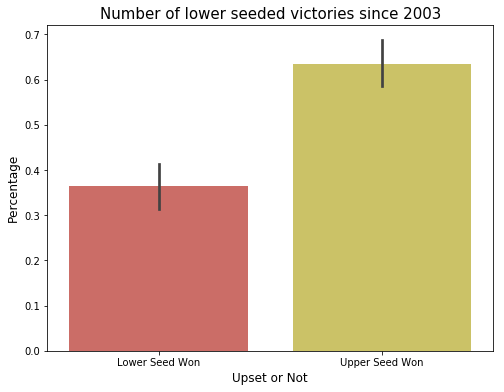

In [2279]:
# Wanted to visualize how often the lower seed has won, so
#the seed difference would have to be positive

upset = []
favorite = []

for i in tourney_teams.seed_diff:
    if i > 0:
        favorite.append(1)
        upset.append(0)
    else:
        upset.append(1)
        favorite.append(0)
        
data = pd.DataFrame({"upset":upset, "favorite":favorite})

f, ax = plt.subplots(figsize=(8, 6))
plot = sns.barplot(data = data)
plt.xlabel('Upset or Not', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Number of lower seeded victories since 2003', fontsize=15)
plt.xticks([0, 1],
           ['Lower Seed Won', 'Upper Seed Won'])
plt.show()


In [1850]:
winner_0_1 = []

for i in tourney_teams.seed_diff:
    
    if i <= 0:
        winner_0_1.append(0)
    else:
        winner_0_1.append(1)


#print(winner_0_1)

tourney_teams['fav_w'] = winner_0_1
#tourney_teams['seed_diff'] = winner_0_1
tourney_teams.head()

,Season,LTeamSeed,WTeamSeed,LTeam,WTeam,DayNum,WTeamID,WScore,LTeamID,LScore,...,LDR,LAst,LTO,LStl,LBlk,LPF,score_diff,re_index,seed_diff,fav_w
0,2003,1,3,Oklahoma,Syracuse,146,1393,63,1328,47,...,14,10,19,13,4,16,16,2003.146,-2,0
1,2003,2,10,Wake Forest,Auburn,139,1120,68,1448,62,...,23,5,18,7,7,23,6,2003.139,-8,0
2,2003,4,12,Louisville,Butler,139,1139,79,1257,71,...,19,13,14,8,2,21,8,2003.139,-8,0
3,2003,5,12,Mississippi St,Butler,137,1139,47,1280,46,...,22,10,10,6,4,13,1,2003.137,-7,0
4,2003,6,3,Oklahoma St,Syracuse,139,1393,68,1329,56,...,27,16,22,8,4,19,12,2003.139,3,1


 for visualization purposes and correlation I want to change my seeding a little bit, right now I have them going from 1-16, having 1 being the best, but python sees 16 as greater than 1, thus my winning team will be negatively correlated with the favorite winning.  Will do this using a simple for loop 


In [1851]:
modified_seed = []

for i in tourney_seeds.Seed:
    i = 16-i
    modified_seed.append(i)
    

tourney_seeds.Seed = modified_seed

#tourney_seeds = tourney_seeds.rename(columns = {'Seed': 'mod_seed'})

tourney_seeds.head()



,Season,Seed,TeamID
1154,2003,15,1328
1155,2003,14,1448
1156,2003,13,1393
1157,2003,12,1257
1158,2003,11,1280


In [1852]:

tourney_teams =  pd.merge(tourney_seeds, tourney_teams, left_on = ["TeamID", "Season"], right_on = ["WTeamID", 'Season'])


tourney_teams = tourney_teams.rename(columns = {'Seed': 'W_mod_seed'})


tourney_teams.head()

,Season,W_mod_seed,TeamID,LTeamSeed,WTeamSeed,LTeam,WTeam,DayNum,WTeamID,WScore,...,LDR,LAst,LTO,LStl,LBlk,LPF,score_diff,re_index,seed_diff,fav_w
0,2003,15,1328,8,1,California,Oklahoma,138,1328,74,...,18,6,9,5,4,23,9,2003.138,7,1
1,2003,15,1328,12,1,Butler,Oklahoma,144,1328,65,...,14,10,13,7,2,18,11,2003.144,11,1
2,2003,15,1328,16,1,S Carolina St,Oklahoma,136,1328,71,...,22,8,18,7,2,23,17,2003.136,15,1
3,2003,14,1448,15,2,ETSU,Wake Forest,137,1448,76,...,25,7,15,12,4,20,3,2003.137,13,1
4,2003,13,1393,1,3,Oklahoma,Syracuse,146,1393,63,...,14,10,19,13,4,16,16,2003.146,-2,0


In [1853]:
tourney_teams = tourney_teams.drop(axis = 1, columns = "TeamID")

In [1854]:
tourney_teams =  pd.merge(tourney_seeds, tourney_teams, left_on = ["TeamID", "Season"], right_on = ["LTeamID", 'Season'])

#tourney_teams.head()


In [1855]:
tourney_teams = tourney_teams.rename(columns = {'Seed': 'L_mod_seed'})
tourney_teams = tourney_teams.drop(axis = 1, columns = "TeamID")

tourney_teams.head()

,Season,L_mod_seed,W_mod_seed,LTeamSeed,WTeamSeed,LTeam,WTeam,DayNum,WTeamID,WScore,...,LDR,LAst,LTO,LStl,LBlk,LPF,score_diff,re_index,seed_diff,fav_w
0,2003,15,13,1,3,Oklahoma,Syracuse,146,1393,63,...,14,10,19,13,4,16,16,2003.146,-2,0
1,2003,14,6,2,10,Wake Forest,Auburn,139,1120,68,...,23,5,18,7,7,23,6,2003.139,-8,0
2,2003,12,4,4,12,Louisville,Butler,139,1139,79,...,19,13,14,8,2,21,8,2003.139,-8,0
3,2003,11,4,5,12,Mississippi St,Butler,137,1139,47,...,22,10,10,6,4,13,1,2003.137,-7,0
4,2003,10,13,6,3,Oklahoma St,Syracuse,139,1393,68,...,27,16,22,8,4,19,12,2003.139,3,1


In [1856]:
# import sqlite3 as sql
# import csv

# #https://www.dataquest.io/blog/python-pandas-databases

# #creating a data base to hold my tables 
# def march_madness_db(db_file = "march_madness.db", 
#                     data_file = ["teams.csv", "tourney_seeds.csv"]):
#                     #data_file2 = "tourney_seeds.csv"):
#     #create cursor which allows us to execute sql quities against a data base 
    
#     with open(data_file, "r") as infile:
#         rows = list(csv.reader(infile))
    
#     with sql.connect(db_file) as conn:
#         cur = conn.cursor()
        
#         #recreate the table
#         cur.execute("DROP TABLE IF EXISTS teams;")
#         cur.execute("CREATE TABLE teams (TeamID INTEGER, TeamName STRING, FirstD1Season	 INTEGER, LastD1Season INTEGER);")
        
#         cur.execute("DROP TABLE IF EXISTS tourney_seeds")
#         cur.execute("CREATE TABLE tourney_seeds (Season INTEGER, Seed STRING, TeamID INTEGER);")
        
        
        
#         #populate the table 
#         cur.executemany("INSERT INTO teams VALUES (?, ?, ?, ?);", rows)
#         #cur.executemany("INSERT INTO tourney_seeds VALUES (?, ?, ?);", rows)
        
        
        
#     for row in cur.execute("SELECT * FROM teams"):
#         print(row)
        
#     for row in cur.execute("SELECT * FROM tourney_seeds"):
#         print(row)
        
#     conn.commit()
    
#     conn.close()

# if __name__ == "__main__":
#     march_madness_db(db_file = "march_madness.db", data_file = "teams.csv")
#     #march_madness_db(db_file = "march_madness.db", data_file = 'tourney_seeds.csv')
    
    
    

## Visualizing data and more feture engineering 

OK, before we start building our model, it is important to see what statistical columns are associated with winning in the tournament.  Since There is not a won or lost column, I will see what are more strongly associated with the Score Difference column feature that we created earlier. 

We will also show how often the seed differential is positive and negative, the positive values will be the "upsets" where the  higher seed, beat the lower seed. 

In [1857]:
numeric_features = tourney_teams.select_dtypes(include=[np.number])

corr = numeric_features.corr()

# The first five features are the most positively correlated Target
print("most  positively correlated columns")
print (corr['fav_w'].sort_values(ascending=False)[:13])


print("")

print("most negative corr ")
print (corr['fav_w'].sort_values(ascending=False)[-10:])

most  positively correlated columns
fav_w         1.000000
seed_diff     0.785378
W_mod_seed    0.666906
LTeamSeed     0.528708
score_diff    0.236322
WFGM          0.121998
WBlk          0.119763
WAst          0.101791
WScore        0.101566
WDR           0.098010
WOR           0.080012
WFGA          0.053508
LFGM3         0.020563
Name: fav_w, dtype: float64

most negative corr 
DayNum       -0.067648
LOR          -0.072736
LScore       -0.091860
LFTM         -0.096747
LFTA         -0.105488
WPF          -0.120309
LDR          -0.131301
LBlk         -0.143812
L_mod_seed   -0.528708
WTeamSeed    -0.666906
Name: fav_w, dtype: float64


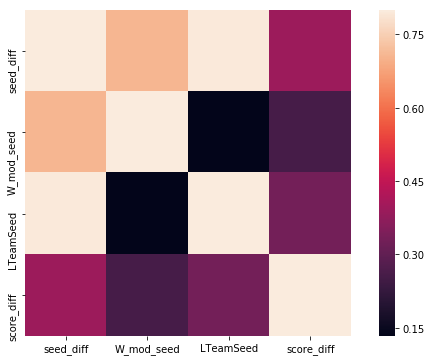

In [1858]:
high_corr = tourney_teams[['seed_diff', 'W_mod_seed', 'LTeamSeed', 
                          'score_diff']]
corr_mat = high_corr.corr()
f, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(corr_mat,vmax=.8,square=True)

This does not look like it will be a good model at all. When it comes to correlated variables in the set, basicalyl the ones associated with seeding are either very highly or negatively correlated, but none of the other variables look like they have very much predictive power.  I am very surprised that my winner mod seed was so negatively correlated as well as my seed differential, which were both designed to avoid being negatively correlated.  This will not likely lead to a good predictive outcome because none of the other in game statistics are very highly correlated with the outcome. Also there will be TONS of auto correlation here which sill bias the results and not give an accurage outcome. 

We will need to figure out another way to appraco this problem. 


#### originally we had thought that we would not use regular season data, seeing that much of the regular season preformance is capured in the seeding process.  However true this is, it is potentially usefull to take into account some of the regular season statistics, such as season records, season feild goal, free throw, three point percentage, defensive rebounds and more, we will try to go through our regular season data, create lots of features from that data to then add to our tourney_teams data with their season record, and some statistical averages.  We will also find a better way to predict the winners and losers of the march madness games other than using seed difference.  For these observations, we will ommit our modified seeding columns and see what else we can glean from the data 

it is also potentially usefull to go back and find teams that are typically very successfull in March, immediate examples, of Duke, Kansas, Kentucky, and North Carolina come to mind, this is also potentially helpful as teams who went deep in a tournament in a previous year could do so again the next year.  We will explose these options below. 

College basketball has, with the growth of TV revenue and distribution formed into power conference over the last several years.  These "Power" conferences are the SEC, BIG 10, Big 12, ACC, Pac 10 and Big East.  This could be potentially sticky as conference allignments have changed over the years, for example, a non P-6 team, the University of Utah, went from a group of 5 conference, the Mountain West to the expanded Pac 12, 

In [1859]:
tourney_teams = tourney_teams.drop(axis = 1, columns = "L_mod_seed")
tourney_teams = tourney_teams.drop(axis = 1, columns = "W_mod_seed")

In [1860]:
reg_deets.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,score_diff
0,2003,10,1104,68,1328,62,N,0,27,58,...,16,22,10,22,8,18,9,2,20,6
1,2003,10,1272,70,1393,63,N,0,26,62,...,9,20,20,25,7,12,8,6,16,7
2,2003,11,1266,73,1437,61,N,0,24,58,...,14,23,31,22,9,12,2,5,23,12
3,2003,11,1296,56,1457,50,N,0,18,38,...,8,15,17,20,9,19,4,3,23,6
4,2003,11,1400,77,1208,71,N,0,30,61,...,17,27,21,15,12,10,7,1,14,6


In [1861]:
conf = pd.read_csv("TeamConferences.csv")


power_conf = ["acc", 'sec', "big_east", "big_ten", 
              "big_twelve", "pac_ten", "pac_twelve"]

conf = conf[conf['Season'] >= 2003]

conf.head()

p6 = []
 
for i in conf.ConfAbbrev:
    if i in power_conf:
        p6.append(1)
    else:
        p6.append(0)
        
#print(p6)
# and I can easily create a feature for both my regular season 
#games and my tourney_teams data 

conf['p6'] = p6

conf.head()



C:\Users\13855\Anaconda_Re_do\lib\site-packages\IPython\core\displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


,Season,TeamID,ConfAbbrev,p6
5407,2003,1125,a_sun,0
5408,2003,1144,a_sun,0
5409,2003,1194,a_sun,0
5410,2003,1205,a_sun,0
5411,2003,1209,a_sun,0


In [1862]:
tourney_teams =  pd.merge(conf, tourney_teams, left_on = ["TeamID", "Season"], right_on = ["WTeamID", 'Season'])

tourney_teams.head()

,Season,TeamID,ConfAbbrev,p6,LTeamSeed,WTeamSeed,LTeam,WTeam,DayNum,WTeamID,...,LDR,LAst,LTO,LStl,LBlk,LPF,score_diff,re_index,seed_diff,fav_w
0,2003,1462,a_ten,0,14,3,Troy,Xavier,137,1462,...,21,13,9,6,6,19,12,2003.137,11,1
1,2003,1181,acc,1,11,3,C Michigan,Duke,138,1181,...,19,8,21,4,2,14,26,2003.138,8,1
2,2003,1181,acc,1,14,3,Colorado St,Duke,136,1181,...,24,8,19,5,4,19,10,2003.136,11,1
3,2003,1268,acc,1,3,6,Xavier,Maryland,139,1268,...,20,12,7,2,0,16,13,2003.139,-3,0
4,2003,1268,acc,1,11,6,UNC Wilmington,Maryland,137,1268,...,19,16,8,7,1,19,2,2003.137,5,1


In [1863]:
tourney_teams = tourney_teams.drop(axis = 1, columns = "ConfAbbrev")
tourney_teams = tourney_teams.drop(axis = 1, columns = "TeamID")

In [1864]:
reg_deets =  pd.merge(conf, reg_deets, left_on = ["TeamID", "Season"], right_on = ["WTeamID", 'Season'])
reg_deets.head()

,Season,TeamID,ConfAbbrev,p6,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,score_diff
0,2003,1125,a_sun,0,14,1125,83,1135,77,N,...,17,27,20,27,17,24,7,7,19,6
1,2003,1125,a_sun,0,28,1125,68,1298,61,H,...,5,10,6,17,16,18,9,3,16,7
2,2003,1125,a_sun,0,40,1125,75,1260,57,H,...,15,24,12,15,8,11,8,1,21,18
3,2003,1125,a_sun,0,55,1125,88,1254,75,N,...,16,23,12,28,16,18,8,1,22,13
4,2003,1125,a_sun,0,61,1125,52,1359,51,A,...,5,12,5,20,17,6,6,0,19,1


In [1865]:
reg_deets = reg_deets.drop(axis = 1, columns = "ConfAbbrev")
reg_deets = reg_deets.drop(axis = 1, columns = "TeamID")

In [1866]:
#I want to merge my team names with my regular season details 
#so i can better understadn as I go

reg_teams = pd.merge(teams, reg_deets, left_on = "TeamID", right_on = "WTeamID")


In [1867]:
reg_teams = reg_teams.drop(axis = 1, columns = "FirstD1Season")
reg_teams = reg_teams.drop(axis = 1, columns = "LastD1Season")
reg_teams = reg_teams.drop(axis = 1, columns = "TeamID")

In [1868]:
reg_teams.head()

,TeamName,Season,p6,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,score_diff
0,Abilene Chr,2014,0,75,1101,73,1146,72,H,0,...,8,20,12,23,11,16,11,1,21,1
1,Abilene Chr,2014,0,94,1101,87,1223,81,H,0,...,16,28,9,15,18,14,6,2,28,6
2,Abilene Chr,2015,0,31,1101,72,1170,61,H,0,...,22,31,17,16,9,14,10,3,22,11
3,Abilene Chr,2015,0,49,1101,65,1354,59,N,0,...,19,24,9,29,11,22,8,6,21,6
4,Abilene Chr,2015,0,50,1101,69,1115,61,N,0,...,16,20,12,18,5,14,3,2,19,8


In [1869]:
#create fielg goal percentage

reg_teams["Wfg%"] = reg_teams["WFGM"] / reg_teams["WFGA"] 
reg_teams["WFT%"] = reg_teams["WFTM"] / reg_teams["WFTA"]
reg_teams["W3%"] = reg_teams["WFGM3"] / reg_teams["WFGA3"]
reg_teams["WTot_boards"] = reg_teams["WOR"] + reg_teams["WDR"]

reg_teams["Lfg%"] = reg_teams["LFGM"] / reg_teams["LFGA"] 
reg_teams["LFT%"] = reg_teams["LFTM"] / reg_teams["LFTA"]
reg_teams["L3%"] = reg_teams["LFGM3"] / reg_teams["LFGA3"]
reg_teams["LTot_boards"] = reg_teams["LOR"] + reg_teams["LDR"]

reg_teams.head()


# 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst',
#        'LTO', 'LStl', 'LBlk', 'LPF', 'score_diff'],

,TeamName,Season,p6,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,...,LPF,score_diff,Wfg%,WFT%,W3%,WTot_boards,Lfg%,LFT%,L3%,LTot_boards
0,Abilene Chr,2014,0,75,1101,73,1146,72,H,0,...,21,1,0.471698,0.750000,0.357143,30,0.535714,0.400000,0.400000,35
1,Abilene Chr,2014,0,94,1101,87,1223,81,H,0,...,28,6,0.613636,0.736842,0.555556,28,0.600000,0.571429,0.384615,24
2,Abilene Chr,2015,0,31,1101,72,1170,61,H,0,...,22,11,0.511111,0.791667,0.411765,34,0.320755,0.709677,0.238095,33
3,Abilene Chr,2015,0,49,1101,65,1354,59,N,0,...,21,6,0.425926,0.611111,0.333333,26,0.400000,0.791667,0.266667,38
4,Abilene Chr,2015,0,50,1101,69,1115,61,N,0,...,19,8,0.533333,0.687500,0.500000,29,0.377358,0.800000,0.263158,30


In [1875]:
reg_avgs_WFGP = reg_teams.groupby(["Season", "WTeamID"])["Wfg%"].mean() 
reg_avgs_WFGP

Season  WTeamID
2003    1102       0.567934
        1103       0.542563
        1104       0.444393
        1105       0.413500
        1106       0.461775
        1107       0.446100
        1108       0.463246
        1110       0.471784
        1111       0.483370
        1112       0.473342
        1113       0.522554
        1114       0.480634
        1115       0.414502
        1116       0.448135
        1117       0.478480
        1119       0.531653
        1120       0.500417
        1122       0.484662
        1123       0.461335
        1124       0.432538
        1125       0.515160
        1126       0.498614
        1127       0.448406
        1128       0.478422
        1129       0.444877
        1130       0.507784
        1131       0.459728
        1132       0.484955
        1133       0.459960
        1135       0.495951
                     ...   
2017    1433       0.485014
        1434       0.466050
        1435       0.463252
        1436       0.511615
    

In [1878]:
## gonna try and merge this to my regular season data 

reg_avgs_WFGP = pd.DataFrame(reg_avgs_WFGP)
reg_teams = pd.merge(reg_avgs_WFGP, reg_deets, left_on = ["WTeamID", "Season"], right_on = ["WTeamID", "Season"])


In [1872]:
# use concatinate 

reg_teams.columns

Index(['TeamName', 'Season', 'p6', 'DayNum', 'WTeamID', 'WScore', 'LTeamID',
       'LScore', 'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM',
       'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM',
       'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO',
       'LStl', 'LBlk', 'LPF', 'score_diff', 'Wfg%', 'WFT%', 'W3%',
       'WTot_boards', 'Lfg%', 'LFT%', 'L3%', 'LTot_boards'],
      dtype='object')

In [1873]:
numeric_features = tourney_teams.select_dtypes(include=[np.number])

corr = numeric_features.corr()

# The first five features are the most positively correlated Target
print("most  positively correlated columns")
print (corr['fav_w'].sort_values(ascending=False)[:13])


print("")

print("most negative corr ")
print (corr['fav_w'].sort_values(ascending=False)[-10:])

most  positively correlated columns
fav_w         1.000000
seed_diff     0.785378
LTeamSeed     0.528708
p6            0.336492
score_diff    0.236322
WFGM          0.121998
WBlk          0.119763
WAst          0.101791
WScore        0.101566
WDR           0.098010
WOR           0.080012
WFGA          0.053508
LFGM3         0.020563
Name: fav_w, dtype: float64

most negative corr 
NumOT       -0.064063
DayNum      -0.067648
LOR         -0.072736
LScore      -0.091860
LFTM        -0.096747
LFTA        -0.105488
WPF         -0.120309
LDR         -0.131301
LBlk        -0.143812
WTeamSeed   -0.666906
Name: fav_w, dtype: float64


Unsurprisnly, the inputs to the score differential were highly correlated with the score difference, which means we obviously have some auto correlation going on, and probably some heteroskedasticity.  However, we are not worried about the theory and only the predictive power of our model. 

Other interesting insights are that the columns for both data sets were the same.  4 of the top 10 categories are from the defensive end of the floor, Rebounds, Steals, Losing teams turnovers and blocks.  While the other 6, were offensive stats and as mentioend above, one was an input.  This perhaps gives data backing to the platitude that "defense wins championships". 

Visually this is snown in the correlation matrix below where in general, the lighter the color, the more highly correlated the specific columns are with the others, here we notice more auto correlation, where made 3's are very highly correlated with the number of 3's attempted, same with regular field goals, the oposition turnovers, and steals, etc.

In [ ]:
high_corr = tourney_teams[['score_diff', 'WFGM', 'WScore', 
                          'WAst', 'WDR', 'WFGA', 'WFGM3',
                          'WStl', 'LTO', 'WBlk', 'WFGA3']]
corr_mat = high_corr.corr()
f, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(corr_mat,vmax=.8,square=True)

PLAN 

create a function that creates three new columns team1, team2, and target(did team 1 win) 
iterate through each row, look at letters in team 1 and team 2 names, and whichever one is earlier < used to compare strings, then that is team 1, if that came from my winning team column, then mark my column as a 1, else mark it as a 0, 